# Market Basket Analysis
## By Rania Hana

In [1]:
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from apyori import apriori
from collections import Counter

In [2]:
#
df = pd.read_csv('Market_Basket_Optimisation.csv')
df.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = pd.read_csv('Market_Basket_Optimisation.csv', header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
transaction = []

for i in range(0,7501):
    transaction.append([str(df.values[i,j]) for j in range(0,20)])
transaction = np.array(transaction)

In [5]:
transaction

array([['shrimp', 'almonds', 'avocado', ..., 'frozen smoothie',
        'spinach', 'olive oil'],
       ['burgers', 'meatballs', 'eggs', ..., 'nan', 'nan', 'nan'],
       ['chutney', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ...,
       ['chicken', 'nan', 'nan', ..., 'nan', 'nan', 'nan'],
       ['escalope', 'green tea', 'nan', ..., 'nan', 'nan', 'nan'],
       ['eggs', 'frozen smoothie', 'yogurt cake', ..., 'nan', 'nan',
        'nan']], dtype='<U20')

In [6]:
# Create the word cloud
# The input should be in the string format, thus we need to flatten the array

transaction_str = ' '.join(transaction.flatten())
transaction_str = transaction_str.replace('nan','')
# transaction_str

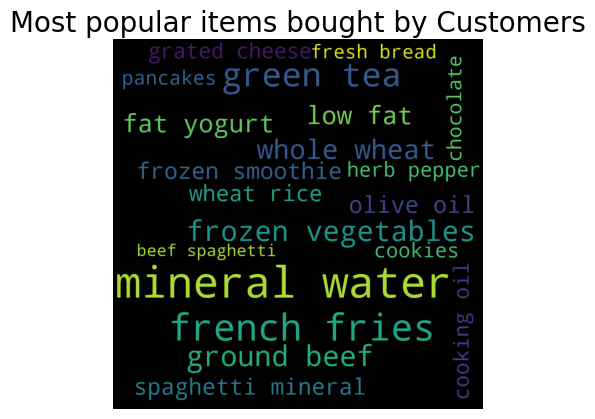

In [7]:
from wordcloud import WordCloud

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=1000, max_words=20).generate(transaction_str)

# Display the word cloud
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most popular items bought by Customers', fontsize = 20)
plt.show()

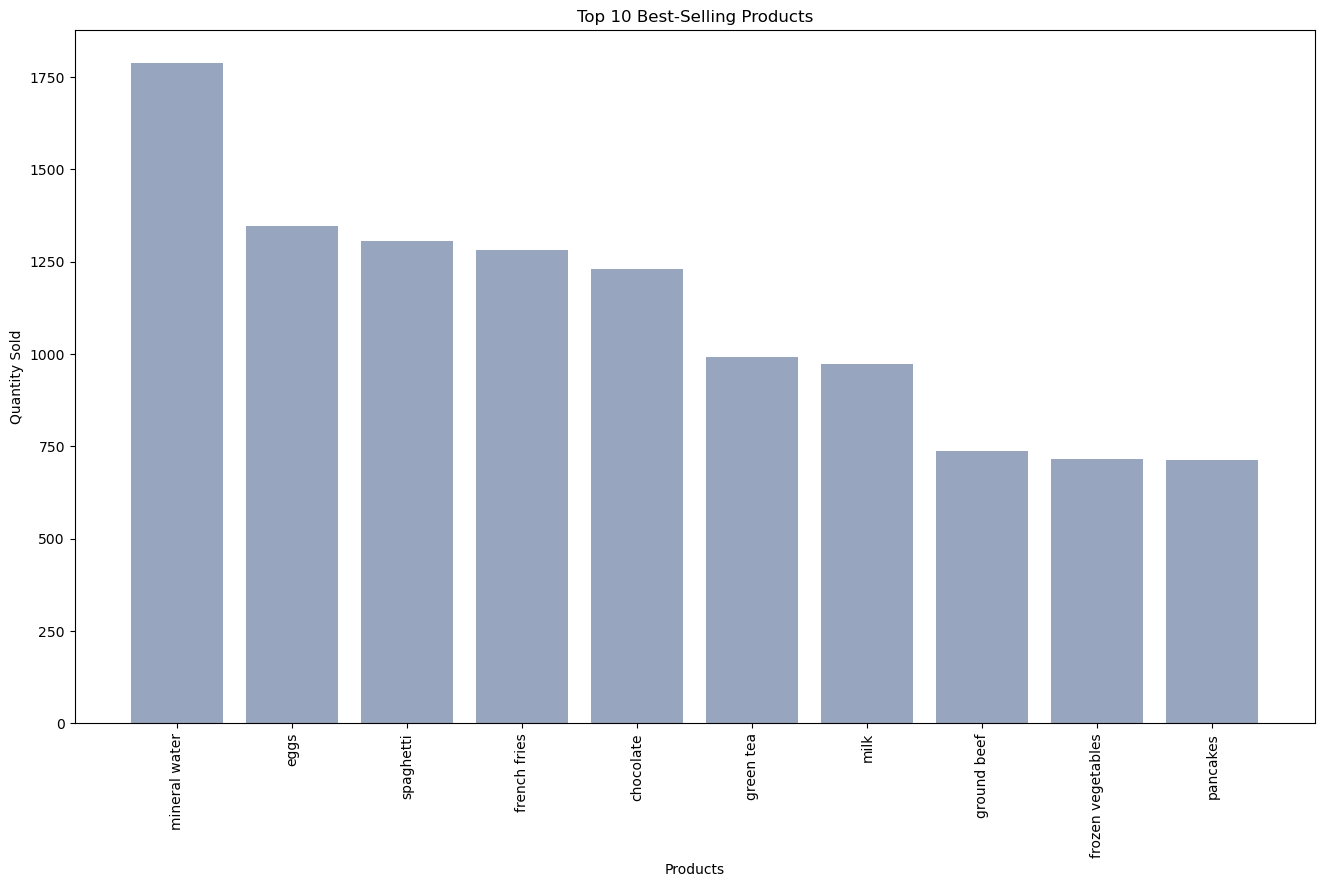

In [8]:
# Plot the bar chart about 'Top 10 Best Selling Items'

# First, we need to flatten the array
transaction_flat = transaction.flatten()

# remove 'nan'
remove_str = 'nan'
mask = transaction_flat != remove_str
filtered_str = transaction_flat[mask]
filtered_str

# count the product frequency
product_count = Counter(filtered_str)

top_products = sorted(product_count.items(), key=lambda x: x[1], reverse=True)[:10]
top_products

# Extract product names and their respective frequencies
product_names = [product[0] for product in top_products]
frequencies = [product[1] for product in top_products]
plt.figure(figsize = (16,9))

plt.bar(product_names, frequencies, color = (0.2, 0.3, 0.5, 0.5))
plt.xlabel('Products')
plt.ylabel('Quantity Sold')
plt.title('Top 10 Best-Selling Products')
plt.xticks(rotation=90)
plt.show()

In [9]:
# Perform Market Basket Analysis3

transaction = list(transaction)
transaction

rules = apriori(transaction, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_length=2)
rules

<generator object apriori at 0x7fdeb9ce5f90>

In [10]:
result = list(rules)
result

[RelationRecord(items=frozenset({'barbecue sauce', 'turkey'}), support=0.0025329956005865884, ordered_statistics=[OrderedStatistic(items_base=frozenset({'barbecue sauce'}), items_add=frozenset({'turkey'}), confidence=0.2345679012345679, lift=3.751585985416831)]),
 RelationRecord(items=frozenset({'brownies', 'cottage cheese'}), support=0.0034662045060658577, ordered_statistics=[OrderedStatistic(items_base=frozenset({'brownies'}), items_add=frozenset({'cottage cheese'}), confidence=0.10276679841897232, lift=3.225329518580382), OrderedStatistic(items_base=frozenset({'cottage cheese'}), items_add=frozenset({'brownies'}), confidence=0.10878661087866107, lift=3.2253295185803816)]),
 RelationRecord(items=frozenset({'extra dark chocolate', 'chicken'}), support=0.0027996267164378083, ordered_statistics=[OrderedStatistic(items_base=frozenset({'extra dark chocolate'}), items_add=frozenset({'chicken'}), confidence=0.23333333333333334, lift=3.8894074074074076)]),
 RelationRecord(items=frozenset({'l

In [11]:
def inspect (result):
    lhs = [tuple(i[2][0][0])[0]for i in result]
    rhs = [tuple(i[2][0][1])[0]for i in result]
    support = [i[1] for i in result]
    confidences = [i[2][0][2] for i in result]
    lifts = [i[2][0][3] for i in result]
    return list(zip(lhs,rhs,support,confidences, lifts))
results = pd.DataFrame(inspect(result),columns = ['Left Hand Side', 'Right Hand Side', 'support', 'confidences', 'lifts'])

In [12]:
results = results.sort_values(by=['lifts'], ascending=False)
results = results.drop_duplicates(keep='first')

In [13]:
results[:10]

,Left Hand Side,Right Hand Side,support,confidences,lifts
318,mushroom cream sauce,escalope,0.002533,0.132867,22.650826
528,olive oil,tomatoes,0.002133,0.188235,8.993331
180,mushroom cream sauce,pasta,0.002666,0.139860,8.890601
103,fresh tuna,fromage blanc,0.002400,0.107784,7.926383
242,light cream,mineral water,0.002400,0.153846,6.748538
340,ground beef,spaghetti,0.002400,0.141732,6.686376
517,ground beef,shrimp,0.002400,0.141732,6.686376
360,parmesan cheese,tomatoes,0.002133,0.107383,6.656831
176,olive oil,mineral water,0.003866,0.058704,6.115863
475,frozen vegetables,shrimp,0.003200,0.139535,5.946882
